# Importing the dependencies

In [52]:
from sklearn.base import RegressorMixin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

# Data collection and pre-processing

In [2]:
mart_data = pd.read_csv("/content/Mart Data.csv")

In [3]:
#Displaying the first five rows of the dataset
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Displaying the last five rows of the dataset
mart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
#Checking the total no. of rows and columns in a dataset
mart_data.shape

(8523, 12)

In [6]:
#Displaying some info of the dataset
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 **Categorical Columns**

 - Item_Identifier
 - Item_Fat_Content
 - Item_Type
 - Outlet_Identifier
 - Outlet_Size
 - Outlet_Location_Type
 - Outlet_Type

In [8]:
#Checking null value in a dataset
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling missing value**

Here we are going some statstical measure.
- Mean = Average value ( used for numerical value)
- Mode = Highest frequency value ( used for categorical value)

In [9]:
# mean value of item weight column
mart_data['Item_Weight'].mean()

12.857645184135976

In [10]:
#Filling the missing values in a weight data with mean value
mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(), inplace=True)

In [11]:
#Now checking the missing value of item weight
mart_data['Item_Weight'].isnull().sum()

0

In [17]:
#mode value of outlet_size
mode_of_outlet_size = mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outlet_size)


Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [19]:
missing_values = mart_data['Outlet_Size'].isnull()

In [20]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [22]:
#Filling the missing values in outlet_size with mode of respective columns.
mart_data.loc[missing_values, 'Outlet_Size']= mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [46]:
#Now checking null values in outlet_size
mart_data['Outlet_Size'].isnull().sum()

0

In [69]:
print(mart_data['Outlet_Size'])

0                                                  Medium
1                                                  Medium
2                                                  Medium
3       Outlet_Type Grocery Store Supermarket Type1 Su...
4                                                    High
                              ...                        
8518                                                 High
8519    Outlet_Type Grocery Store Supermarket Type1 Su...
8520                                                Small
8521                                               Medium
8522                                                Small
Name: Outlet_Size, Length: 8523, dtype: object


# Data Analysis

In [24]:
#Displaying the statstistal measure of the dataset
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Numerical Columns**

In [25]:
sns.set()

<Figure size 600x600 with 0 Axes>

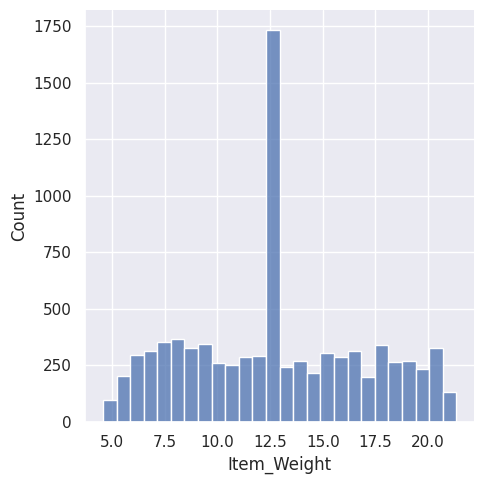

In [26]:
# Displot of Item_weight
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

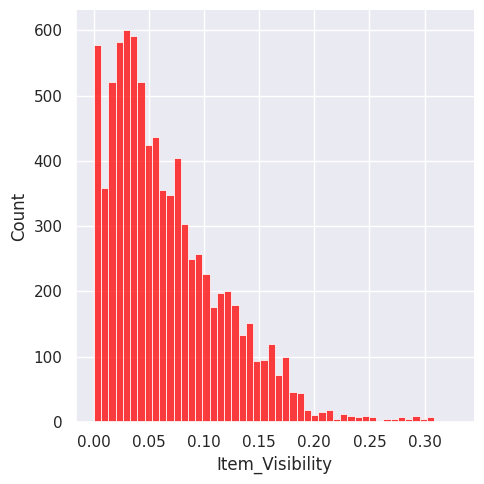

In [27]:
# Displot of Item_Visibility
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Visibility'], color='Red')
plt.show()

<Figure size 600x600 with 0 Axes>

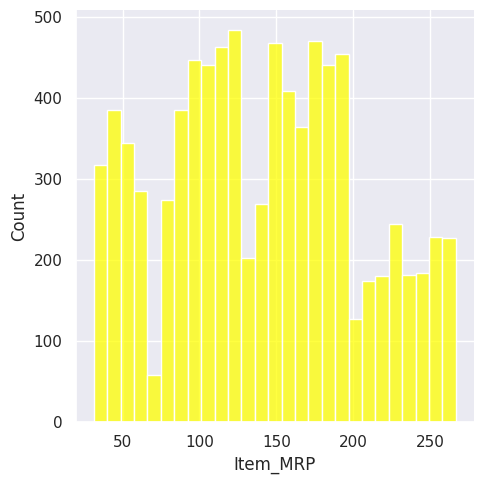

In [29]:
# Displot of Item_MRP
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_MRP'], color=('Yellow'))
plt.show()

<Figure size 600x600 with 0 Axes>

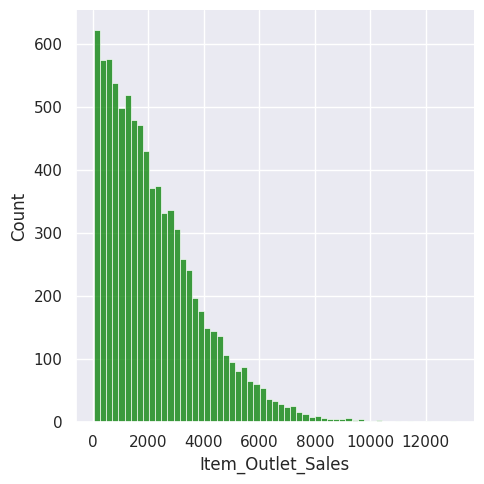

In [30]:
# Displot of Item_Outlet_Sales
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Outlet_Sales'], color='Green')
plt.show()

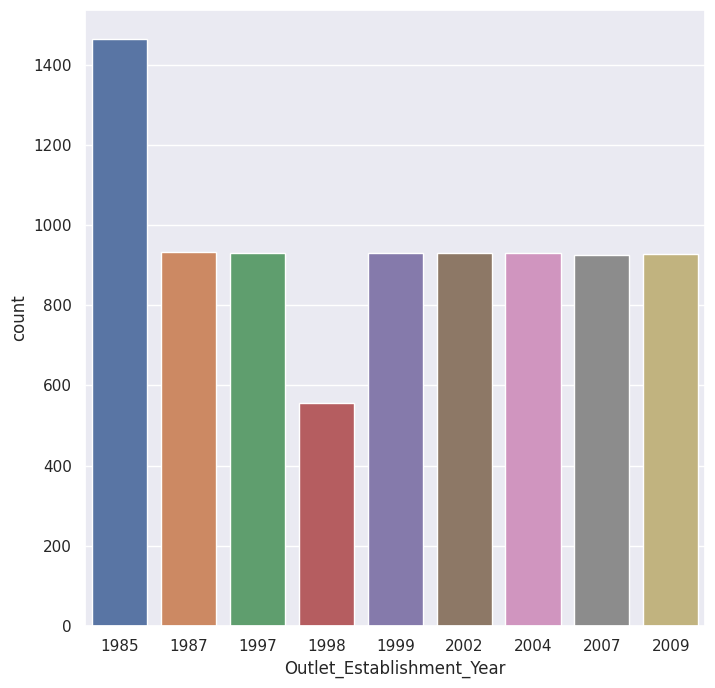

In [31]:
# Countplot of Outlet_Establishment_Year column
plt.figure(figsize=(8,8))
sns.countplot(data=mart_data, x='Outlet_Establishment_Year')
plt.show()

**Categorical Features**

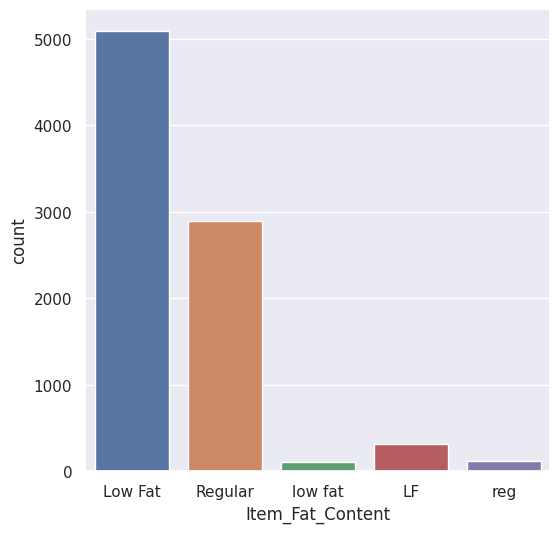

In [33]:
# Countplot of Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(data=mart_data, x='Item_Fat_Content')
plt.show()

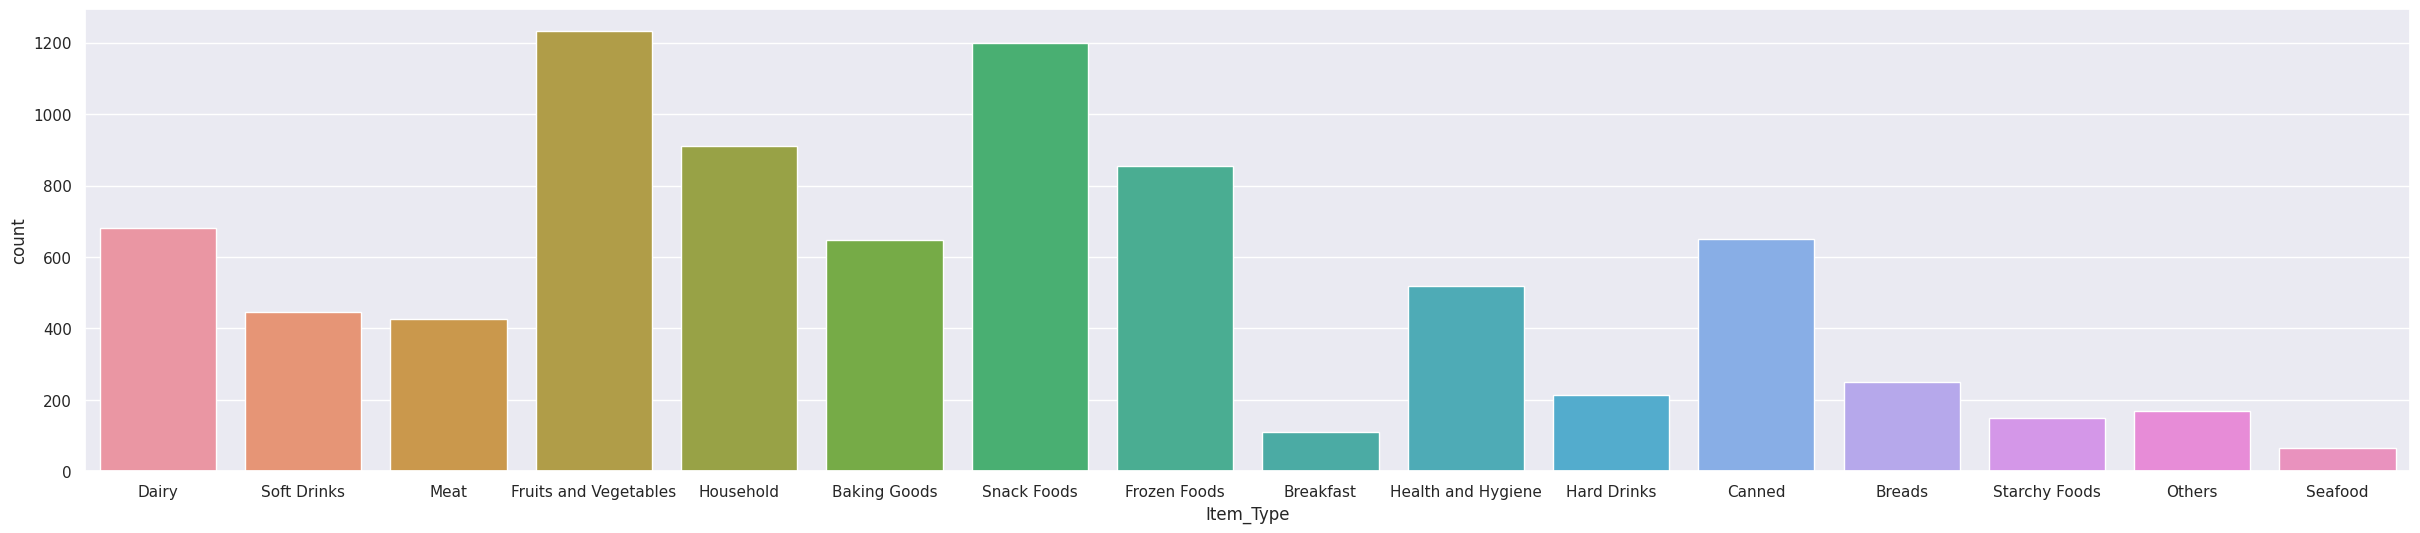

In [42]:
# Countplot of Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(data=mart_data, x='Item_Type')
plt.show()

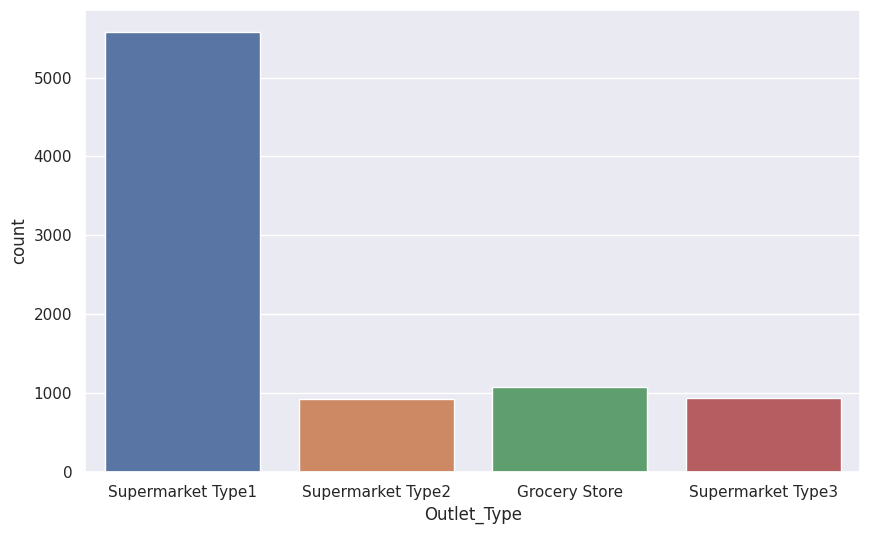

In [43]:
# Countplot of Outlet_Type column
plt.figure(figsize=(10,6))
sns.countplot(data=mart_data, x='Outlet_Type')
plt.show()

# Data pre-processing

In [47]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:
mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)

In [50]:
mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Label Encoding**

In [53]:
encoder = LabelEncoder()

In [55]:
mart_data['Item_Identifier']=encoder.fit_transform(mart_data['Item_Identifier'])

mart_data['Item_Fat_Content']=encoder.fit_transform(mart_data['Item_Fat_Content'])

mart_data['Item_Type']=encoder.fit_transform(mart_data['Item_Type'])

mart_data['Outlet_Identifier']=encoder.fit_transform(mart_data['Outlet_Identifier'])

# mart_data['Outlet_Size']=encoder.fit_transform(mart_data['Outlet_Size'])

mart_data['Outlet_Location_Type']=encoder.fit_transform(mart_data['Outlet_Location_Type'])

mart_data['Outlet_Type']=encoder.fit_transform(mart_data['Outlet_Type'])

In [56]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


# Splitting the features and target

In [57]:
X=mart_data.drop(columns=['Outlet_Size', 'Item_Outlet_Sales'], axis=1)
Y=mart_data['Item_Outlet_Sales']

In [58]:
print(X,Y)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 10 columns] 0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4 

# splitting data into train test split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [60]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


# Model Training

Here, we are using XGBoost Regressor for model training

In [61]:
regressor = XGBRegressor()

In [62]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Model Evaluation

In [63]:
# prediction on training data
X_train_prediction = regressor.predict(X_train)

In [64]:
# R square value
error_score = metrics.r2_score(Y_train, X_train_prediction)
print("R square value on training data: ", error_score)

R square value on training data:  0.8589562021934799


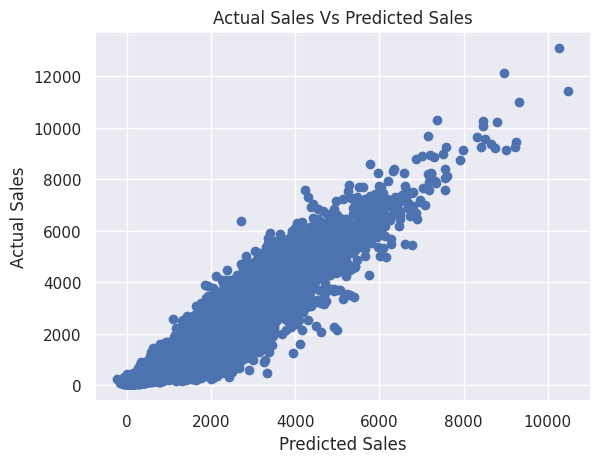

In [65]:
#Visualizing acutal price and predicted price
plt.scatter(X_train_prediction, Y_train)
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Actual Sales Vs Predicted Sales")
plt.show()

In [66]:
# predicting on testing data
X_test_prediction = regressor.predict(X_test)

In [68]:
# R square error
error_score = metrics.r2_score(Y_test, X_test_prediction)
print("R square error on testing data: ", error_score)

R square error on testing data:  0.5304668733482136


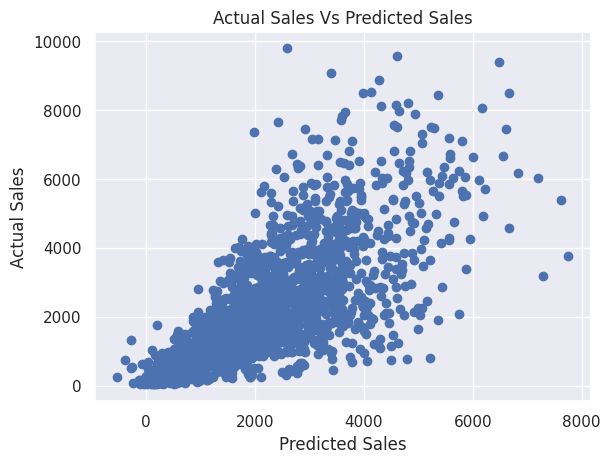

In [70]:
#Visualizing acutal price and predicted price
plt.scatter(X_test_prediction, Y_test)
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Actual Sales Vs Predicted Sales")
plt.show()